In [0]:
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
max_features = 10000
maxlen = 500

In [0]:
(train_data, y_train), (test_data, y_test) = imdb.load_data(num_words=max_features)
print('Number of train sequences: ', len(train_data))
print('Number of test sequences: ', len(test_data))

17465344/17464789 [==============================] - 0s 0us/step
Number of train sequences:  25000
Number of test sequences:  25000


In [0]:
from keras.preprocessing import sequence
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)

In [0]:
print('train_data shape:', train_data.shape)
print('test_data shape:', test_data.shape)

train_data shape: (25000, 500)
test_data shape: (25000, 500)


In [0]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import GRU

In [0]:
model = Sequential()
model.add(Embedding(max_features, 32))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [0]:
history = model.fit(train_data, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.4944 - acc: 0.7461 - val_loss: 0.3655 - val_acc: 0.8516
Epoch 2/10
20000/20000 [==============================] - 95s 5ms/step - loss: 0.2918 - acc: 0.8831 - val_loss: 0.3320 - val_acc: 0.8620
Epoch 3/10
20000/20000 [==============================] - 109s 5ms/step - loss: 0.2385 - acc: 0.9070 - val_loss: 0.3681 - val_acc: 0.8452
Epoch 4/10
20000/20000 [==============================] - 106s 5ms/step - loss: 0.2098 - acc: 0.9212 - val_loss: 0.3223 - val_acc: 0.8692
Epoch 5/10
20000/20000 [==============================] - 82s 4ms/step - loss: 0.1858 - acc: 0.9313 - val_loss: 0.6193 - val_acc: 0.8076
Epoch 6/10
20000/20000 [==============================] - 59s 3ms/step - loss: 0.1773 - acc: 0.9335 - val_loss: 0.3786 - val_acc: 0.8490
Epoch 7/10
20000/20000 [==============================] - 59s 3ms/step - loss: 

In [0]:
import matplotlib.pyplot as plt
 
def plot_results(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
 
    plt.title('Training and validation Accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation Loss')
    plt.legend()
    plt.show()

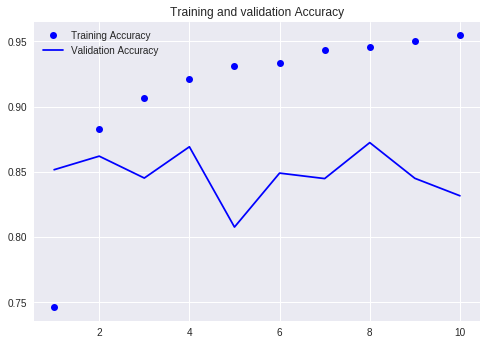

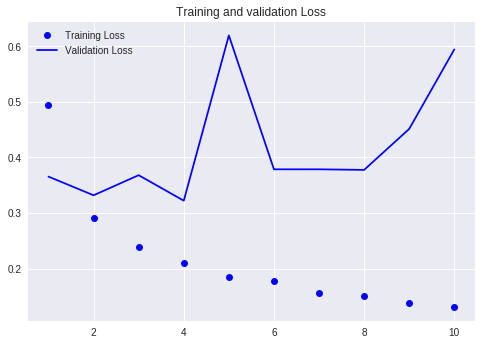

In [0]:
plot_results(history)